<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression (SLR) with Sacramento Real Estate Data

_Instructor: Aymeric Flaisler_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from pandas_summary import DataFrameSummary

% matplotlib inline

In [7]:
sac_csv = '../datasets/sacramento_real_estate_transactions.csv'

In [8]:
import pandas as pd
shd = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [9]:
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [10]:
# shd.info()

In [11]:
from pandas_summary import DataFrameSummary
dfs=DataFrameSummary(shd)
dfs.summary()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,NaN,NaN,985,NaN,985,985,985,NaN,NaN,985,985,985
mean,NaN,NaN,95750.7,NaN,2.91168,1.77665,1312.92,NaN,NaN,233716,38.4451,-121.193
std,NaN,NaN,85.1761,NaN,1.30793,0.895371,856.123,NaN,NaN,139089,5.10364,5.10067
min,NaN,NaN,95603,NaN,0,0,-984,NaN,NaN,-210944,-121.503,-121.552
25%,NaN,NaN,95660,NaN,2,1,950,NaN,NaN,145000,38.4827,-121.446
50%,NaN,NaN,95762,NaN,3,2,1304,NaN,NaN,213750,38.6259,-121.376
75%,NaN,NaN,95828,NaN,4,2,1718,NaN,NaN,300000,38.6956,-121.295
max,NaN,NaN,95864,NaN,8,5,5822,NaN,NaN,884790,39.0208,38.6684
counts,985,985,985,985,985,985,985,985,985,985,985,985
uniques,981,39,68,2,8,6,604,4,5,605,969,967


_**Fun Fact:** Zip codes often have leading zeros, i.e 02215 = Boston, MA, which will often get knocked off automatically by many softwares like Python and Excel. You can imagine that this could create some issues. _

In [12]:
# Zip code is better as a string object (categorical) so I will have to convert it.
shd['zip'] = shd['zip'].astype(str)

In [13]:
# Looks like we have some values that seem out of place being that there are
# houses with 0 bedrooms,  0 baths, a negative sqr footage and a negative price.  
# There are also some bizarre longitudes/latitudes. A house in Antartica perhaps. 

In [14]:
# Check out the cities. Most cities with very few observations.
# shd.city.value_counts()

In [15]:
# Whats the deal with the houses that have 0 bedrooms?
# shd[shd['beds'] == 0]

In [16]:
print (shd[shd['beds'] == 0].shape)

(108, 12)


In [17]:
# Given the large value of houses that have 0 beds, 0 baths and 0 square feet 
# I am going to make an assumption that these are plots of land that have yet
# to have anything built on them.
# As a result I will *not* be dropping them.

In [18]:
# what about those houses that are less than 0 dollars?
shd[shd['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [19]:
# And the negative square feet?
shd[shd['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [20]:
# Looks like the house with a negative price is also the one with a negative squarefeet.
# It is time to make a choice.  Assume that the data was entered improperly and is meant 
# to be possitive or drop the data.

# Side note, the state is actually labeled wrong as well.

In [21]:
# Let me check if any other values are also not labeled right.
shd[shd['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [22]:
#Looks like it is just one row, so I am going to drop it.

shd = shd[shd['sq__ft'] > 0].reset_index(drop=True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a Simple Linear Regression model. 

**For each of these variables you believe to be valid potential predictors in an Simple Linear Regression model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [23]:
# Id say we can use 'beds','baths','sq__ft'
# Maybe 'latitude' & 'longitude', but that's more involved.

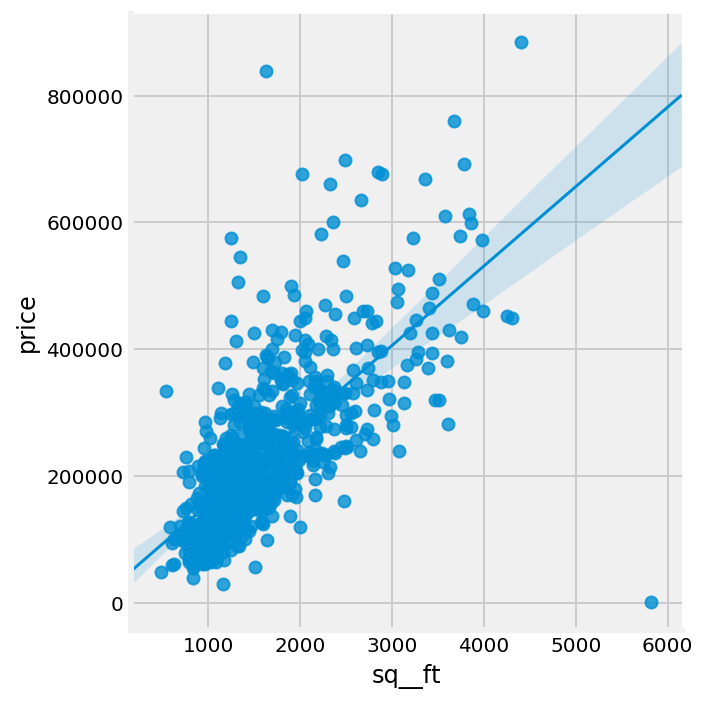

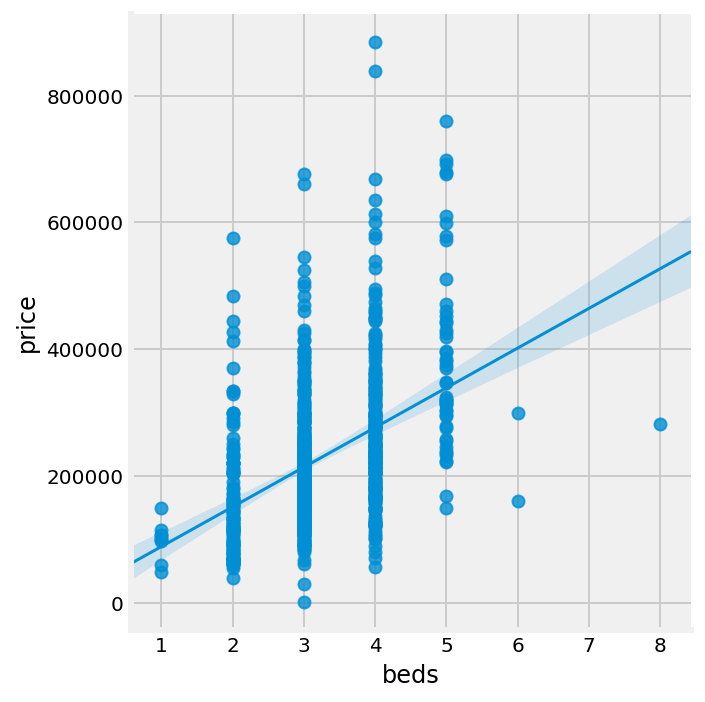

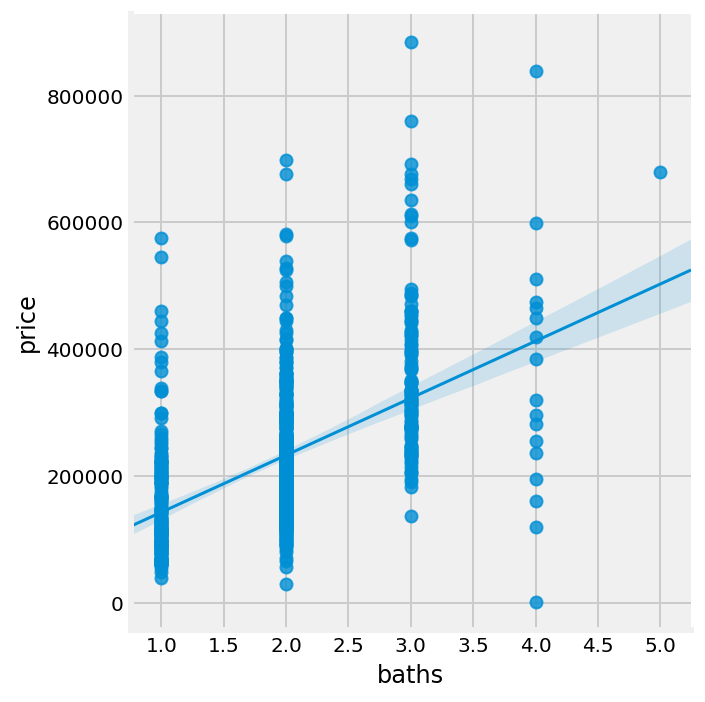

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you're  all done cleaning or made a good deal a progress cleaning, it is never a bad idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in a Simple Linear Regression model? Why?

In [25]:
# It looks like Square Footage is a better predictor than Beds or Baths.
# Beds and Baths are discrete measures as opposed to Square feet, which is continuous.  
# Additionally, there is probably some strong coorelations between them in that houses 
# with bigger square feet will have more beds and more baths.

# If we dropped all the plots of land that are in the dataset (those with 0 sq ft, 
# beds & baths)  we would see a much stronger trend line in our lm plot.

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [26]:
import numpy as np
import scipy.stats

# Get the optimal Slope and y intercept


def lin_reg(x, y):
    # Using other libraries for standard Deviation and Pearson Correlation Coef.
    # Note that in Simple Linear Regression, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x, y)[0]) * (np.std(y) / np.std(x))

    # Pearson Correlation Coef returns a tuple so it needs to be sliced/indexed
    # the optimal beta is found by: mean(y) - b1 * mean(x)
    beta_0 = np.mean(y) - (beta_1 * np.mean(x))

    # Print the Optimal Values
    print ('The Optimal Y Intercept is ', np.round(beta_0,2))
    print ('The Optimal slope is ', np.round(beta_1,2))
    return beta_0, beta_1

In [27]:
a

The Optimal Y Intercept is  29984.36
The Optimal slope is  125.31


### 6. Interpret the intercept. Interpret the slope.

In [114]:
# The intercept should be the relative y value that our data starts around 
# in that from this point out, as x increase so should the y value from this point.

# The intercept is an "offset". Without the intercept our regression line would
# be forced to pass through the origin.

# The slope is the increase in our target (price) variable for a 1-unit increase
# in our predictor variable (sq__ft). So, for every sq__ft increase there is
# an associated increase of ~125 dollars.

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [115]:
# Prediction
# You are a real estate agent with a separate database on house characteristics and locations.
# You want to estimate the most likely price that one of these houses will sell at based
# on the model that we built using this data.

# Inference
# You work for an architecture company that wants to understand what characteristics of a house
# and what areas are associated with perceived value. You have some hypotheses about what
# makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [30]:
# predictor: y = beta_0+beta_1*x
# Creating a list of predicted values
y_pred = []

for x in shd['sq__ft']:
    y = beta_0+beta_1*x
    y_pred.append(y)


In [31]:
# Appending the predicted values to the Sacramento housing dataframe to do DF calcs
shd['Pred'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
shd['Residuals'] = abs(shd['price']-shd['Pred'])

In [32]:
shd['Residuals'].mean()
# the mean of our residuals is aproximately $60200, which means that is
# on average how off our prediction is.

60222.69461586799

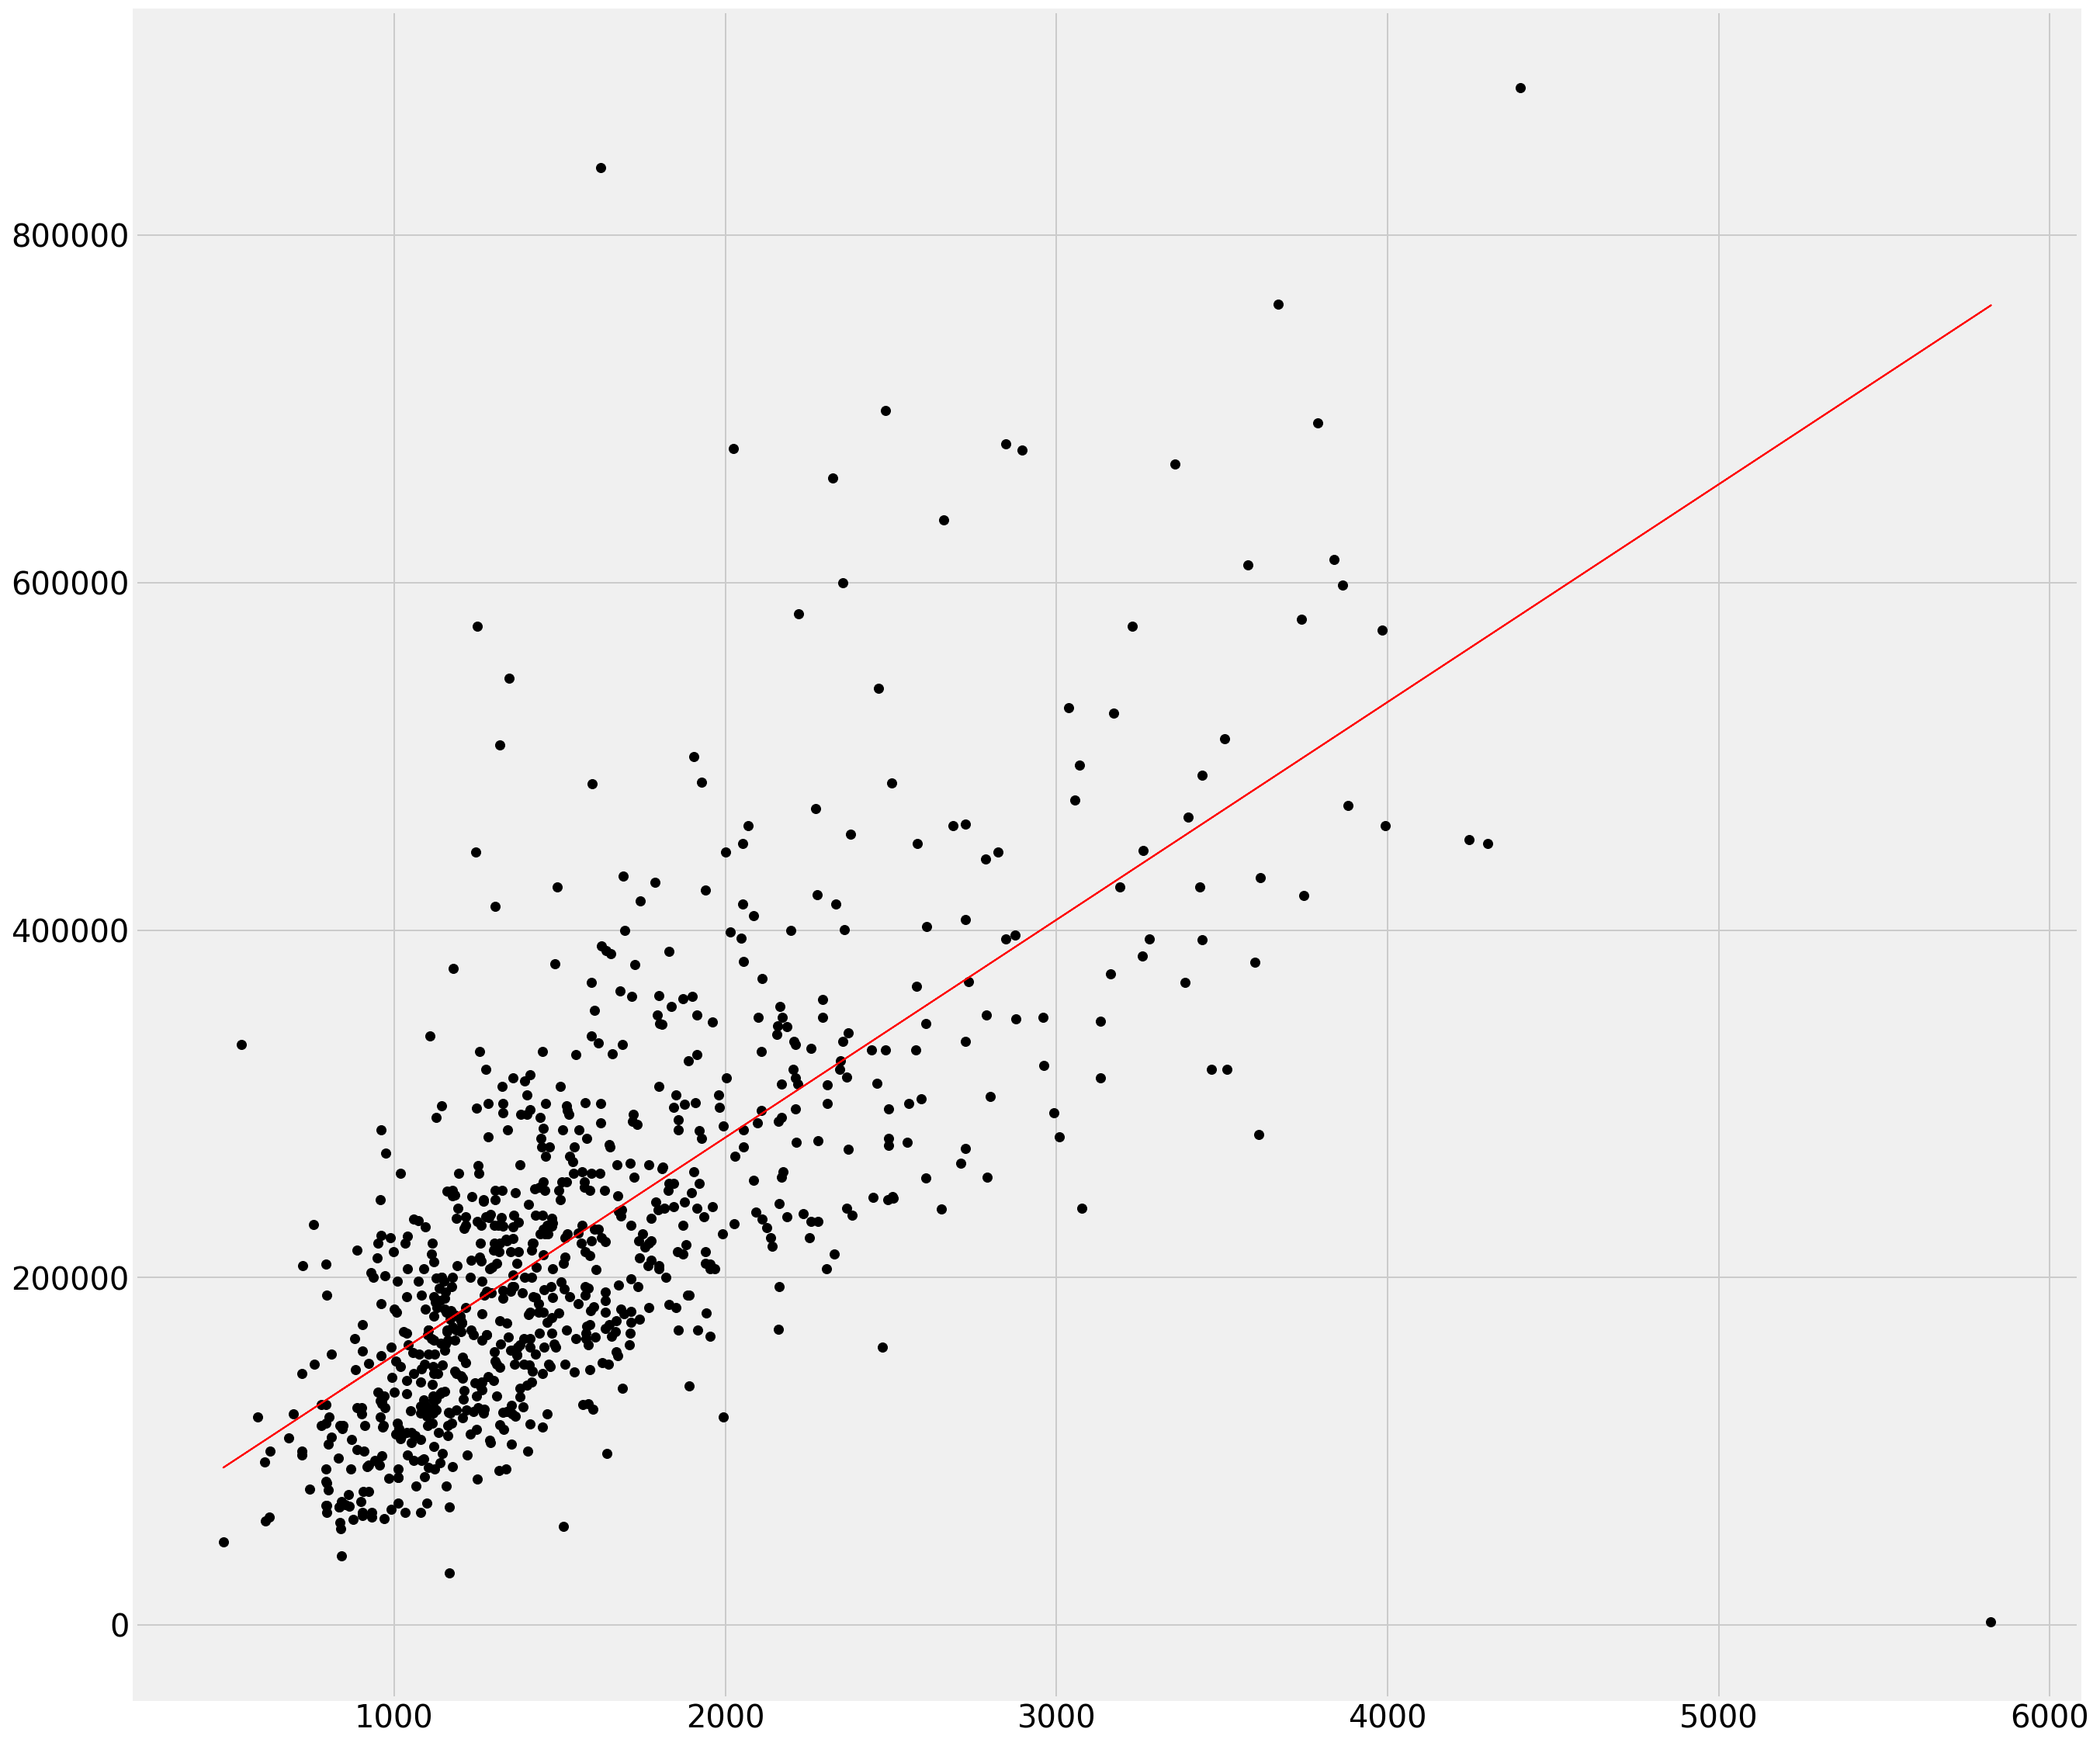

In [33]:
# Plot showing out linear forcast
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

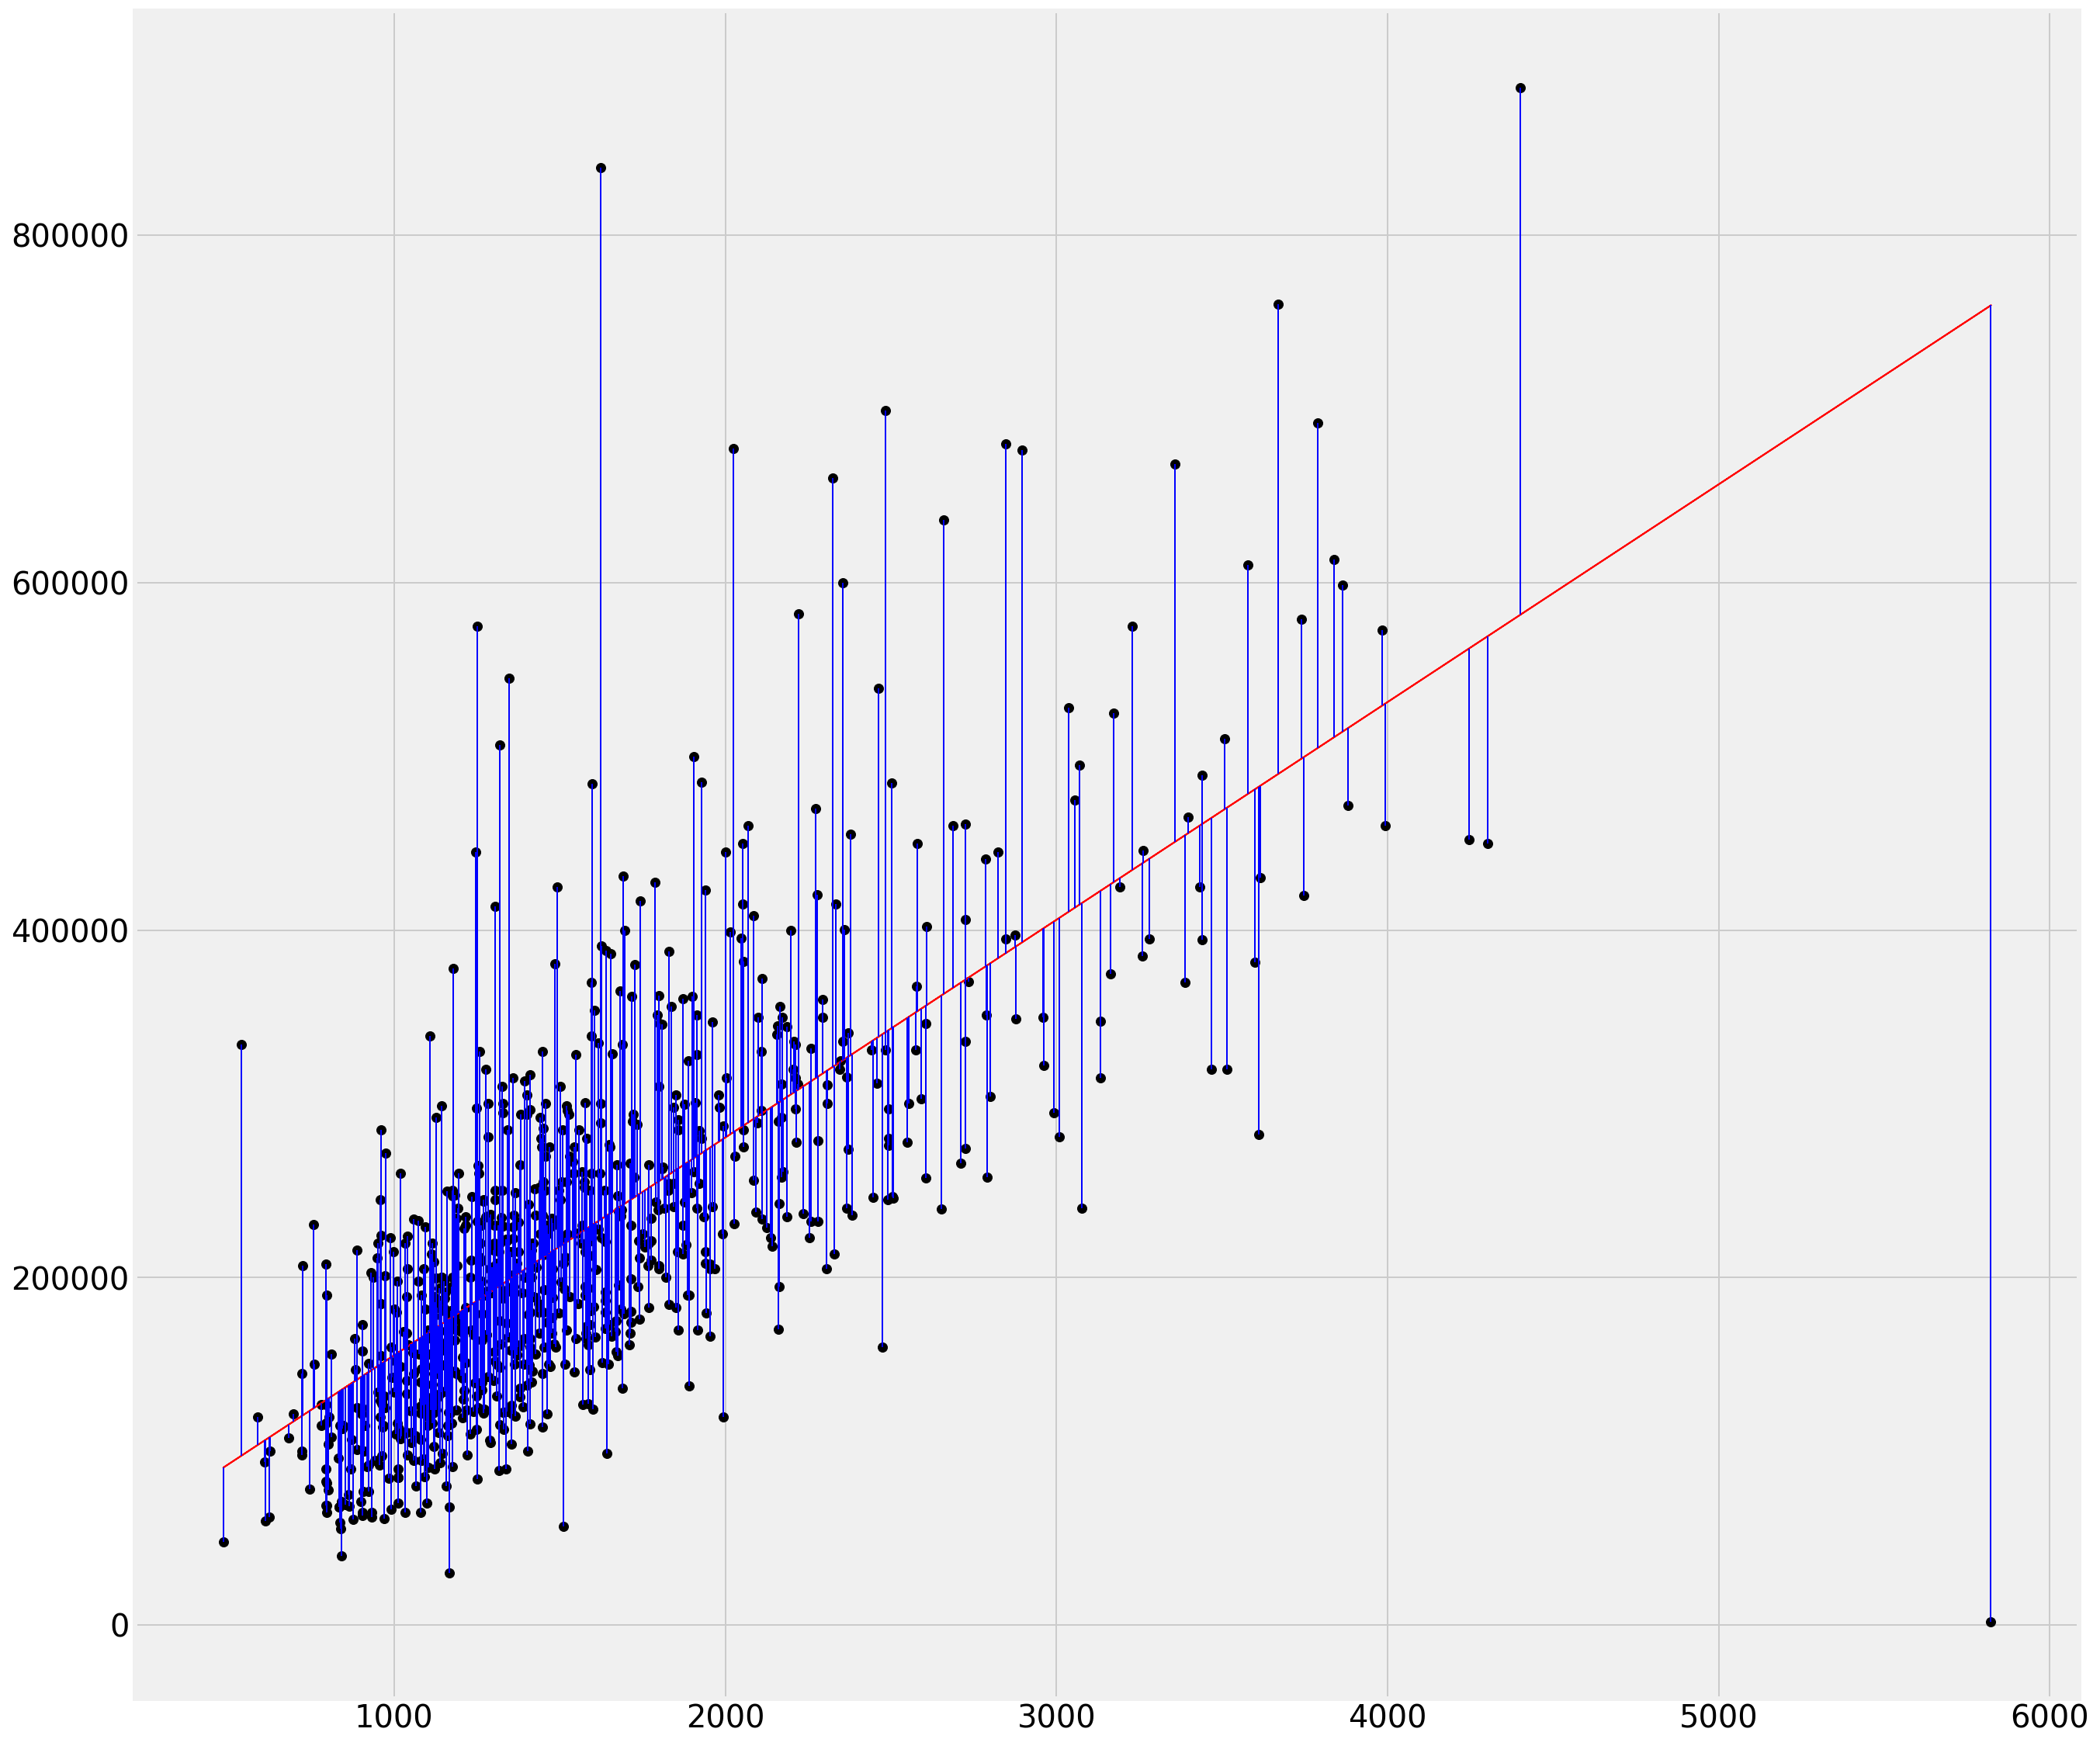

In [34]:
### Plot with residuals
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= shd['sq__ft'], y=shd['price'], c='k')
ax.plot(shd['sq__ft'], shd['Pred'], color='r');

# iterate over predictions
for _, row in shd.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Pred']), 'b-')

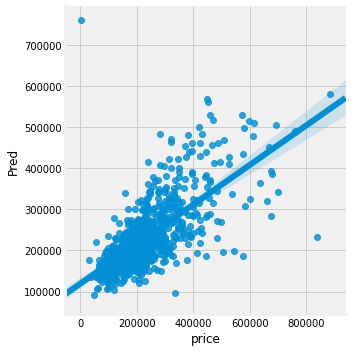

In [121]:
# One more plot, Lets look how our Predictions compared to the true values.
sns.lmplot(x='price', y='Pred', data=shd)

In [122]:
# Note that We would probably have had a less insightful
# model if we haven't removed the observations with negative sq_ft from our data.